# Diplodatos Kaggle Competition

We present this peace of code to create the baseline for the competition, and as an example of how to deal with these kind of problems. The main goals are that you:

1. Learn
1. Try different models and see which one fits the best the given data
1. Get a higher score than the given one in the current baseline example
1. Try to get the highest score in the class :)

In [1]:
# Import the required packages
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

In [2]:
path = 'C:/Users/santi/Documents/diplodatos/4AprendizajeSupervisado'

In [24]:
# load the given labels
breed = pd.read_csv(path+ '/breed_labels.csv')
color = pd.read_csv(path+ '/color_labels.csv')
state = pd.read_csv(path+ '/state_labels.csv')

Now we take a look at the labels, just to understand what these are

In [27]:
breed.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [5]:
color.head()

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


In [7]:
state

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


And now we are ready to deal with the *original* dataset...

In [17]:
original_df = pd.read_csv(path+'/train.csv')

In [6]:
original_df.columns

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'Description',
       'AdoptionSpeed', 'PID'],
      dtype='object')

In [11]:
original_df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,AdoptionSpeed,PID
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,1.454734,10.520412,265.469854,74.388868,1.779059,2.230675,3.236912,1.856738,1.860518,1.460971,1.729730,1.566528,1.912115,1.036666,1.584011,20.809960,41345.994613,2.518900,7477.025799
std,0.497970,18.374027,60.121490,123.434010,0.684763,1.743985,2.748595,2.974465,0.547535,0.593843,0.670791,0.701482,0.564041,0.198228,1.488348,78.397243,32.409109,1.176018,4310.921553
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,2.000000,3768.250000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,2.000000,7473.500000
75%,2.000000,12.000000,307.000000,188.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,4.000000,11200.750000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,4.000000,14992.000000


In [19]:
original_df.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,Description,AdoptionSpeed,PID
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,Nibble is a 3+ month old ball of cuteness. He ...,2,0
1,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,"Good guard dog, very alert, active, obedience ...",2,3
2,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,This handsome yet cute boy is up for adoption....,2,4
3,2,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,This is a stray kitten that came to my house. ...,2,5
4,2,12,264,264,1,1,0,0,2,3,2,2,3,1,1,300,41326,anyone within the area of ipoh or taiping who ...,1,6


Create a function to transform the datasets. This is done by means of a function so that the transformations are the same for the training and testing datasets... We replace the encodings just to make it easy to "visualize" the data

In [4]:
def transform_data(train_data_fname, test_data_fname):
    def transform_columns(df):
        df = df.drop(["Description"], axis=1)
        df.Type = df.Type.replace({1: 'Dog', 2: 'Cat'})
        df.Gender = df.Gender.replace({1:'Male', 2:'Female', 3:'Mixed'})
        df.MaturitySize = df.MaturitySize.replace({1:'S', 2:'M', 3:'L', 4:'XL', 0:'N/A'})
        df.FurLength = df.FurLength.replace({1:'S', 2:'M', 3:'L', 0:'N/A'})
        df.Vaccinated = df.Vaccinated.replace({1:'T', 2:'N', 3:'N/A'})
        df.Dewormed = df.Dewormed.replace({1:'T', 2:'F', 3:'N/A'})
        df.Sterilized = df.Sterilized.replace({1:'T', 2:'F', 3:'N/A'})
        df.Health = df.Health.replace({1:'Healthy', 2: 'MinorInjury', 3:'SeriousInjury', 0: 'N/A'})
        df.Color1 = df.Color1.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Color2 = df.Color2.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Color3 = df.Color3.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Breed1 = df.Breed1.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))
        df.Breed2 = df.Breed2.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))
        return df
    
    df_train = pd.read_csv(train_data_fname)
    df_train = transform_columns(df_train)
    df_test = pd.read_csv(test_data_fname)
    df_test = transform_columns(df_test)
    
    df = pd.concat([df_train, df_test], sort=True)

    # set dummy variables for everything
    # except from Age, Quantity, Fee
    df = pd.get_dummies(df)
    # get train and test back
    n = len(df_train)
    df_train = df.iloc[:n]
    df_test = df.iloc[n:]
    
    y = df_train['AdoptionSpeed']
    X = df_train.drop('AdoptionSpeed', axis=1)
    yy = None
    XX = df_test.drop('AdoptionSpeed', axis=1)

    return X, y, XX, yy

In [5]:
 pd.options.display.max_rows = 10

In [17]:
sampler = np.random.permutation(5) #length of the axis
sampler

array([1, 2, 3, 0, 4])

Load the data...

In [6]:
X, y, XX, yy = transform_data(path+"/train.csv", path+"/test.csv")

In [18]:
X.iloc[sampler]

,Age,Fee,PID,Quantity,State,Breed1_Abyssinian,Breed1_Affenpinscher,Breed1_Airedale Terrier,Breed1_Akita,Breed1_American Bulldog,...,MaturitySize_S,MaturitySize_XL,Sterilized_F,Sterilized_N/A,Sterilized_T,Type_Cat,Type_Dog,Vaccinated_N,Vaccinated_N/A,Vaccinated_T
1,4,150,3,1,41401,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,1,0,4,1,41326,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,3,0,5,1,41326,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
0,3,100,0,1,41326,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
4,12,300,6,1,41326,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


Create the model and evaluate it

In [7]:
# split training dataset into train and "validation" 
# (we won't be using validation set in this example, because of the cross-validation;
# but it couldn be useful for you depending on your approach)
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

results = pd.DataFrame(columns=('clf', 'best_acc'))

from sklearn.tree import DecisionTreeClassifier as DT

In [183]:
samples_split=np.linspace(400,800,52).astype(int)
samples_split

array([400, 407, 415, 423, 431, 439, 447, 454, 462, 470, 478, 486, 494,
       501, 509, 517, 525, 533, 541, 549, 556, 564, 572, 580, 588, 596,
       603, 611, 619, 627, 635, 643, 650, 658, 666, 674, 682, 690, 698,
       705, 713, 721, 729, 737, 745, 752, 760, 768, 776, 784, 792, 800])

In [197]:
samples_split=np.linspace(400,800,52).astype(int)
#samples_split
#samples_split = (100,600,1100,1600,2100,2600)
tree_param = {'criterion':('gini', 'entropy'), 'min_samples_leaf':(1, 8),
              'min_samples_split': samples_split} #best 680

tree = DT(random_state=42)
tree_clf = GridSearchCV(tree, tree_param, scoring='accuracy', cv=3, iid=False)
tree_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_tree_clf = tree_clf.best_estimator_
print('Best Decision Tree accuracy: ', tree_clf.best_score_)
print(best_tree_clf)
results = results.append({'clf': best_tree_clf, 'best_acc': tree_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])


Best Decision Tree accuracy:  0.3716767402311983
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=494,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
The best classifier so far is: 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=496,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


No handles with labels found to put in legend.


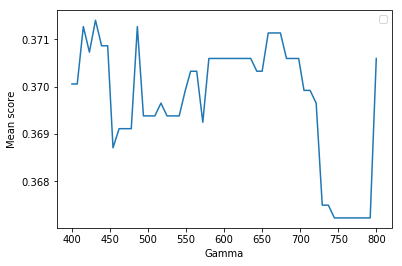

In [196]:

scores = tree_clf.cv_results_['mean_test_score'][53:105]

plt.plot(samples_split, scores)
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()

In [182]:
np.argmax(tree_clf.cv_results_['mean_test_score'][:26])

6

In [159]:
tree_clf.cv_results_['mean_test_score'][:11]

array([0.36816759, 0.36897643, 0.37005731, 0.36938254, 0.37059794,
       0.37032803, 0.37059761, 0.36722314, 0.36722314, 0.36303692,
       0.36182235])

In [190]:
scores = tree_clf.cv_results_['mean_test_score'][:52]

No handles with labels found to put in legend.


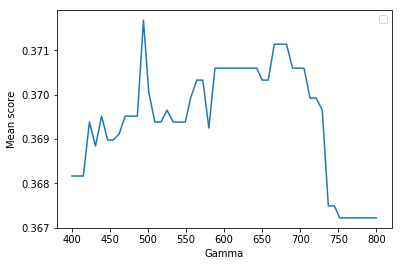

In [191]:
plt.plot(samples_split, scores)
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()

**And finally**, we predict the unknown label for the testing set

In [12]:
X.shape, XX.shape

((10582, 360), (4411, 360))

In [19]:
yy = results.clf.iloc[0].predict(XX.drop(["PID"], axis=1))
yy = yy.astype(np.int)

The last thing we do is generating a file that should be *submitted* on kaggle

In [14]:
submission = pd.DataFrame(list(zip(XX.PID, yy)), columns=["PID", "AdoptionSpeed"])

In [15]:
submission.to_csv("../data/submission.csv", header=True, index=False)

## ==========================================

## Perceptron

In [80]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

In [23]:
X, y, XX, yy = transform_data(path+"/train.csv", path+"/test.csv")

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)


In [36]:
penalty ='l1'
alpha = 0.0002
max_iter = 100

In [37]:
model = Perceptron(penalty=penalty, alpha=alpha, max_iter=max_iter)
model.fit(X_train,y_train)

C:\Users\santi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Perceptron(alpha=0.0002, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=1500, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty='l1', random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
accuracy_score(y_train, model.predict(X_train))

0.2179019846091535

In [ ]:
#yy = results.clf.iloc[0].predict(XX.drop(["PID"], axis=1))
#yy = yy.astype(np.int)

In [42]:
results = pd.DataFrame(columns=('clf', 'best_acc'))

perc_param = {'penalty':('l1','l2','elasticnet'),
              'alpha':(0.0001, 0.001, 0.01),
              'max_iter':(10, 50, 150)}
perc = Perceptron(random_state=1)
perc_clf = GridSearchCV(perc, perc_param, scoring='accuracy', cv=3, iid=False)
perc_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_perc_clf = perc_clf.best_estimator_
print('Best Perceptron accuracy: ', perc_clf.best_score_)
print(best_perc_clf)
results = results.append({'clf': best_perc_clf, 'best_acc': perc_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

C:\Users\santi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\santi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\santi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.

C:\Users\santi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\santi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\santi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.

C:\Users\santi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\santi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\santi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.

C:\Users\santi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\santi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\santi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.

C:\Users\santi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\santi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Best Decision Tree accuracy:  0.2505647853890121
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=50, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty='l1', random_state=1, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)
The best classifier so far is: 
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=50, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty='l1', random_state=1, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)


In [89]:
results = pd.DataFrame(columns=('clf', 'best_acc'))

perc_param = {'penalty':('l1','l2','elasticnet'),
              'alpha':(1, 10),
              'max_iter':(50, 1000)}
perc = Perceptron(random_state=1)
perc_clf = GridSearchCV(perc, perc_param, scoring='accuracy', cv=3, iid=False)
perc_clf.fit(X_train.drop(["PID"], axis=1), y_train)
best_perc_clf = perc_clf.best_estimator_
print('Best Perceptron accuracy: ', perc_clf.best_score_)
print(best_perc_clf)
results = results.append({'clf': best_perc_clf, 'best_acc': perc_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

C:\Users\santi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\santi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\santi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.

C:\Users\santi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\santi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\santi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.

Best Perceptron accuracy:  0.2505647853890121
Perceptron(alpha=1, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=50, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty='l1', random_state=1, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)
The best classifier so far is: 
Perceptron(alpha=1, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=50, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty='l1', random_state=1, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)


In [41]:
accuracy_score(y_valid, model.predict(X_valid))

0.21921259842519686

In [43]:
import seaborn as sns

In [44]:
%matplotlib inline

In [73]:
X_train.shape

(7407, 360)

In [74]:
original_df.shape

(10582, 20)

In [86]:
col=(['Type','Age','Breed1','Breed2','Gender','MaturitySize'])

In [82]:
original_df[col]

,Age,Breed1,Breed2
0,3,299,0
1,4,307,0
2,1,307,0
3,3,266,0
4,12,264,264
...,...,...,...
10577,3,307,0
10578,24,179,307
10579,2,266,0
10580,9,266,0


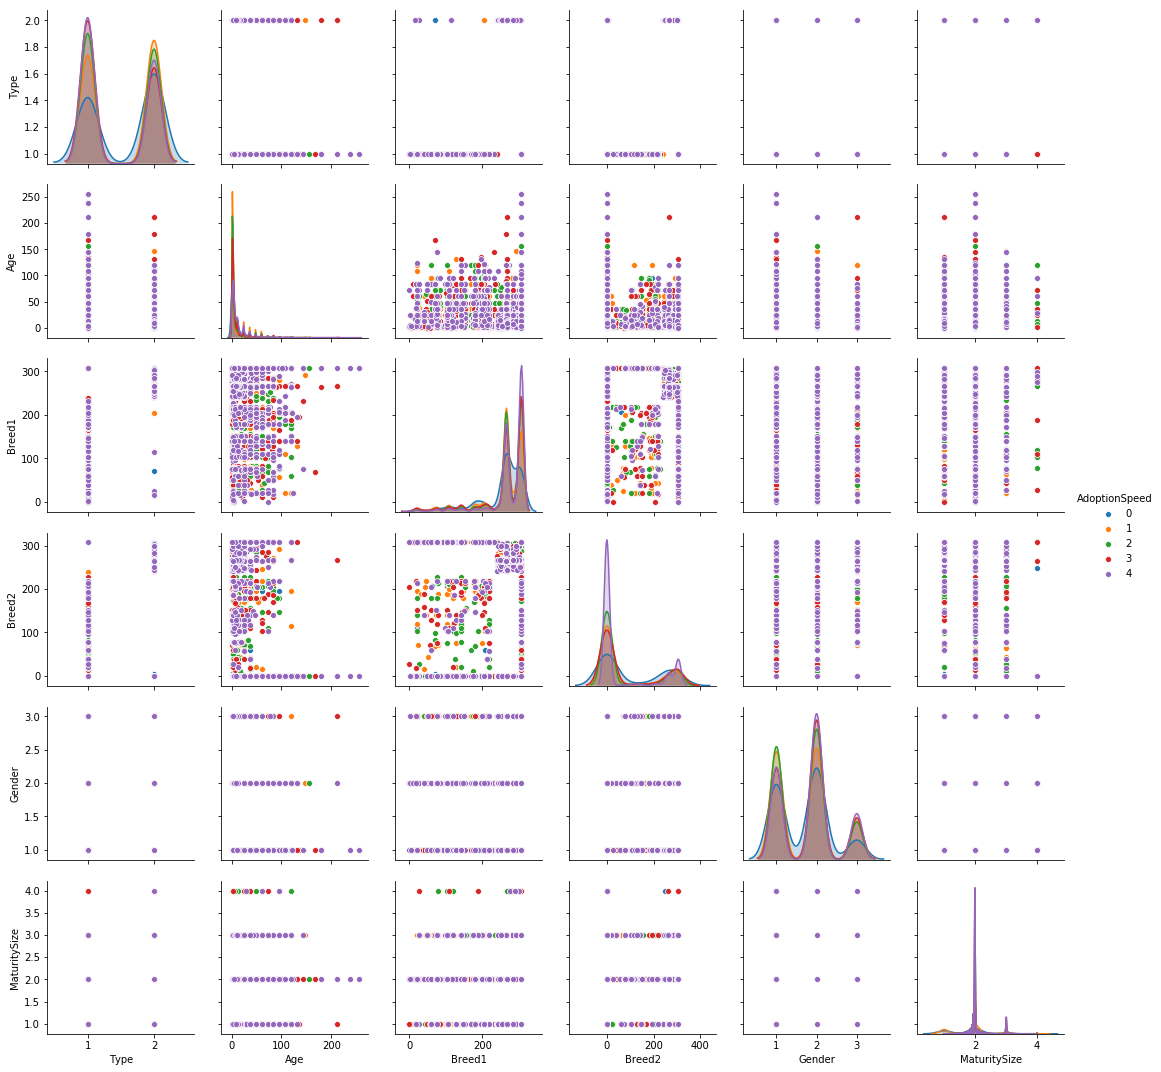

In [87]:
ax=sns.pairplot(original_df, vars= col, hue='AdoptionSpeed')

## ==========================================

## PCA  
https://towardsdatascience.com/dimensionality-reduction-does-pca-really-improve-classification-outcome-6e9ba21f0a32  
https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/

In [22]:
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.decomposition import PCA

In [3]:
import matplotlib.pyplot as plt

In [41]:
#Normalización, se puede saltear
sc = StandardScaler()
pX_train = sc.fit_transform(X_train.drop(['PID'],axis=1))
pX_test = sc.transform(X_valid.drop(['PID'],axis=1))

C:\Users\santi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\santi\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\santi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


Cuando el número de componentes es entero, descompone para esa cantidad de componentes,  
PCA(n_components=5) por ejemplo.  
Cuando 0<n_components<1, y svd_solver='full', descompone para la cantidad de componentes que sea necesaria para explicar la varianza indicada por n_components. Por ejemplo abajo, descompone para alcanzar el 75% de la varianza explicada por los componentes.

In [42]:
pca = PCA(n_components=0.75, svd_solver='full')
pX_train = pca.fit_transform(pX_train)
pX_test = pca.transform(pX_test)

Varianza explicada por cada componente

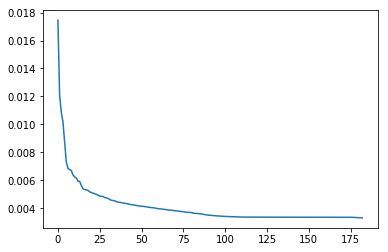

In [43]:
explained_variance = pca.explained_variance_ratio_
plt.plot(explained_variance)

In [44]:
explained_variance

array([0.01745098, 0.01212362, 0.01087409, 0.0101934 , 0.00872349,
       0.0073221 , 0.00684611, 0.00675588, 0.00670952, 0.00637893,
       0.00623604, 0.00616827, 0.00593326, 0.00591845, 0.00562536,
       0.0053834 , 0.00533314, 0.00530889, 0.00526782, 0.00516834,
       0.0051179 , 0.00507731, 0.00503816, 0.00498977, 0.00493224,
       0.00486366, 0.00485135, 0.00483408, 0.00475932, 0.00473441,
       0.00470113, 0.00462172, 0.00456534, 0.004551  , 0.00452611,
       0.00445841, 0.00443785, 0.00442509, 0.00439152, 0.00437251,
       0.00434714, 0.00432726, 0.00430519, 0.00427871, 0.00424667,
       0.00423996, 0.00421314, 0.00419657, 0.00417331, 0.00415175,
       0.00414577, 0.00412382, 0.00411346, 0.00409403, 0.00407723,
       0.00405018, 0.00403903, 0.00403192, 0.0040142 , 0.0039803 ,
       0.00396442, 0.00394282, 0.00393362, 0.00392144, 0.00390806,
       0.00389415, 0.00386946, 0.00385764, 0.00385296, 0.00383722,
       0.00381406, 0.00380561, 0.00378918, 0.00376711, 0.00375

Suma acumulada de varianza por componente

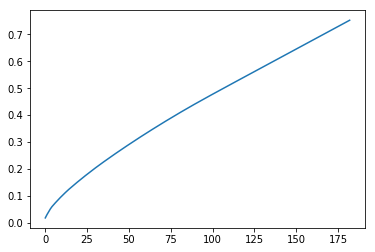

In [51]:
plt.plot(np.cumsum(explained_variance))

In [105]:
pca = PCA(n_components=1)
pX_train = pca.fit_transform(X_train.drop(['PID'],axis=1))
pX_test = pca.transform(X_valid.drop(['PID'],axis=1))

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(pX_train, y_train)
y_pred = classifier.predict(pX_test)

C:\Users\santi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [53]:

cm = confusion_matrix(y_valid,y_pred)

In [54]:
cm

array([[  0,   0,  59,   0,  32],
       [  0,   0, 402,   1, 247],
       [  0,   0, 457,   2, 367],
       [  0,   0, 348,   1, 347],
       [  0,   0, 347,   2, 563]], dtype=int64)

In [55]:
accuracy_score(y_valid, y_pred)

0.3215748031496063

In [50]:
samples_split=np.linspace(400,800,52).astype(int)
#samples_split
#samples_split = (100,600,1100,1600,2100,2600)
tree_param = {'criterion':('gini', 'entropy'), 'min_samples_leaf':(1, 8),
              'min_samples_split': samples_split} #best 680

results = pd.DataFrame(columns=('clf', 'best_acc'))
tree = DT(random_state=42)
tree_clf = GridSearchCV(tree, tree_param, scoring='accuracy', cv=3, iid=False)
tree_clf.fit(pX_train, y_train)
best_tree_clf = tree_clf.best_estimator_
print('Best Decision Tree accuracy: ', tree_clf.best_score_)
print(best_tree_clf)
results = results.append({'clf': best_tree_clf, 'best_acc': tree_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])



Best Decision Tree accuracy:  0.3163221041951039
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=713,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
The best classifier so far is: 
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=713,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


## =================================

### XGBoost

In [11]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [13]:
y_pred = model.predict(X_valid)

In [18]:
accuracy = accuracy_score(y_valid, y_pred)

In [19]:
accuracy

0.37763779527559055

In [23]:
sc = StandardScaler()
nX_train = sc.fit_transform(X_train.drop(['PID'],axis=1))
nX_test = sc.transform(X_valid.drop(['PID'],axis=1))

C:\Users\santi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\santi\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\santi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
model2 = XGBClassifier()
model2.fit(nX_train, y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [26]:
y_pred = model2.predict(nX_test)
accuracy = accuracy_score(y_valid, y_pred)

In [27]:
accuracy

0.37984251968503935

In [39]:
param = {'max_depth':(2,3,6), 'learning_rate':(0.1,0.01,0.001)}

In [41]:
xg_param = param
results = pd.DataFrame(columns=('clf', 'best_acc'))
xg = XGBClassifier()
xg_clf = GridSearchCV(xg, xg_param, scoring='accuracy', cv=5, iid=False)
xg_clf.fit(nX_train, y_train)
best_xg_clf = xg_clf.best_estimator_
print('Best accuracy: ', xg_clf.best_score_)
print(best_xg_clf)
results = results.append({'clf': best_xg_clf, 'best_acc': xg_clf.best_score_}
                         , ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])


Best accuracy:  0.3873372159311161
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
The best classifier so far is: 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)


## =====================================================

## Exploración

In [28]:
copy = original_df

In [20]:
original_df.columns

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'Description',
       'AdoptionSpeed', 'PID'],
      dtype='object')

In [23]:
original_df.Breed1

0        299
1        307
2        307
3        266
4        264
        ... 
10577    307
10578    179
10579    266
10580    266
10581    307
Name: Breed1, Length: 10582, dtype: int64

In [30]:
    def transform_columns(df):
        df = df.drop(["Description"], axis=1)
        df.Type = df.Type.replace({1: 'Dog', 2: 'Cat'})
        df.Gender = df.Gender.replace({1:'Male', 2:'Female', 3:'Mixed'})
        df.MaturitySize = df.MaturitySize.replace({1:'S', 2:'M', 3:'L', 4:'XL', 0:'N/A'})
        df.FurLength = df.FurLength.replace({1:'S', 2:'M', 3:'L', 0:'N/A'})
        df.Vaccinated = df.Vaccinated.replace({1:'T', 2:'N', 3:'N/A'})
        df.Dewormed = df.Dewormed.replace({1:'T', 2:'F', 3:'N/A'})
        df.Sterilized = df.Sterilized.replace({1:'T', 2:'F', 3:'N/A'})
        df.Health = df.Health.replace({1:'Healthy', 2: 'MinorInjury', 3:'SeriousInjury', 0: 'N/A'})
        df.Color1 = df.Color1.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Color2 = df.Color2.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Color3 = df.Color3.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Breed1 = df.Breed1.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))
        df.Breed2 = df.Breed2.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))
        return df

In [31]:
transform_columns(copy)

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,AdoptionSpeed,PID
0,Cat,3,Tabby,N/A,Male,Black,White,N/A,S,S,N,F,F,Healthy,1,100,41326,2,0
1,Dog,4,Mixed Breed,N/A,Female,Black,Brown,N/A,M,S,T,T,F,Healthy,1,150,41401,2,3
2,Dog,1,Mixed Breed,N/A,Male,Black,N/A,N/A,M,S,N,F,F,Healthy,1,0,41326,2,4
3,Cat,3,Domestic Short Hair,N/A,Female,Cream,Gray,N/A,M,S,N,F,F,Healthy,1,0,41326,2,5
4,Cat,12,Domestic Long Hair,Domestic Long Hair,Male,Black,N/A,N/A,M,L,N,F,N/A,Healthy,1,300,41326,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10577,Dog,3,Mixed Breed,N/A,Male,Black,Brown,White,M,M,T,T,F,Healthy,1,0,41326,2,14983
10578,Dog,24,Poodle,Mixed Breed,Male,Brown,Golden,White,M,M,N/A,N/A,F,Healthy,1,0,41326,4,14985
10579,Cat,2,Domestic Short Hair,N/A,Mixed,Black,N/A,N/A,M,M,N,F,F,Healthy,4,0,41326,2,14988
10580,Cat,9,Domestic Short Hair,N/A,Female,Yellow,White,N/A,S,S,T,T,T,Healthy,1,0,41336,4,14991


In [36]:
breed.BreedName.unique()

array(['Affenpinscher', 'Afghan Hound', 'Airedale Terrier', 'Akbash',
       'Akita', 'Alaskan Malamute', 'American Bulldog',
       'American Eskimo Dog', 'American Hairless Terrier',
       'American Staffordshire Terrier', 'American Water Spaniel',
       'Anatolian Shepherd', 'Appenzell Mountain Dog',
       'Australian Cattle Dog/Blue Heeler', 'Australian Kelpie',
       'Australian Shepherd', 'Australian Terrier', 'Basenji',
       'Basset Hound', 'Beagle', 'Bearded Collie', 'Beauceron',
       'Bedlington Terrier', 'Belgian Shepherd Dog Sheepdog',
       'Belgian Shepherd Laekenois', 'Belgian Shepherd Malinois',
       'Belgian Shepherd Tervuren', 'Bernese Mountain Dog',
       'Bichon Frise', 'Black and Tan Coonhound',
       'Black Labrador Retriever', 'Black Mouth Cur',
       'Black Russian Terrier', 'Bloodhound', 'Blue Lacy',
       'Bluetick Coonhound', 'Boerboel', 'Bolognese', 'Border Collie',
       'Border Terrier', 'Borzoi', 'Boston Terrier',
       'Bouvier des Flande

In [40]:
import seaborn as sns

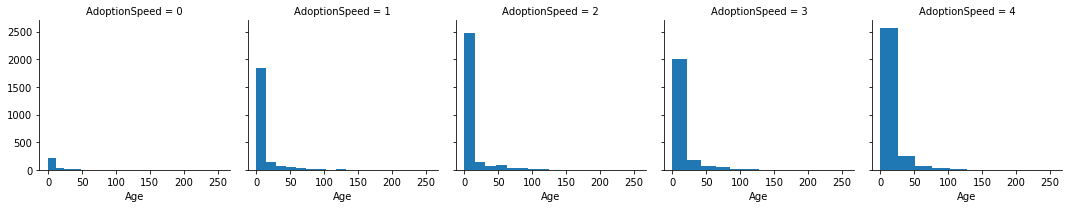

In [83]:
g = sns.FacetGrid(original_df, col='AdoptionSpeed')
g.map(plt.hist, 'Age')

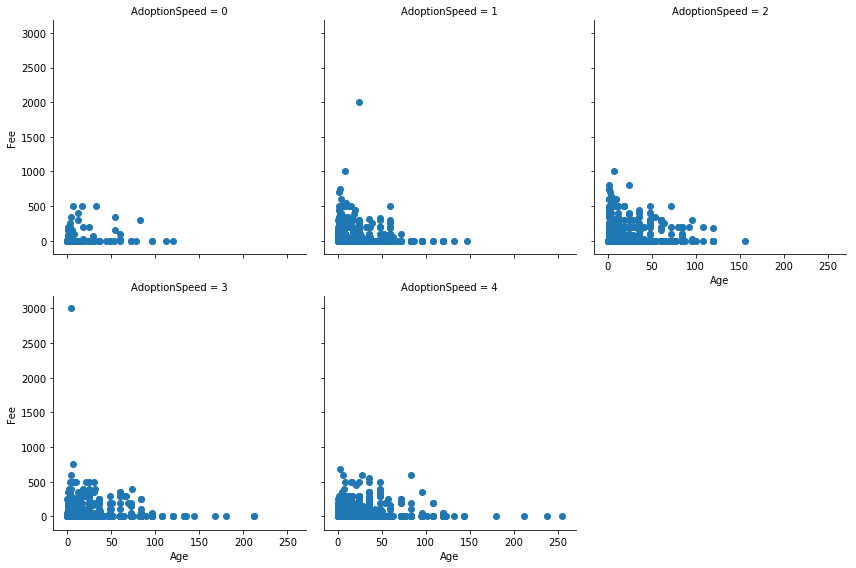

In [93]:
g = sns.FacetGrid(original_df, col='AdoptionSpeed', height=4, aspect=1,
                 col_wrap=3)
g.map(plt.scatter, 'Age','Fee')

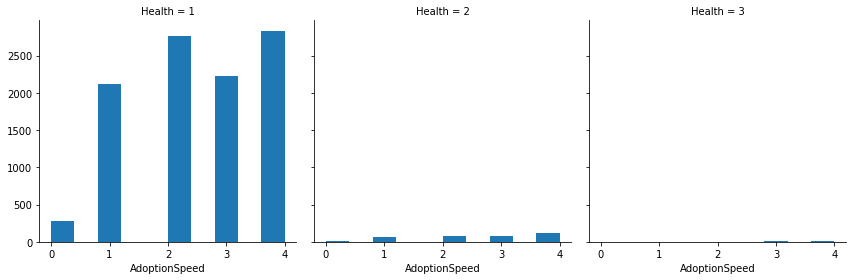

In [100]:
g = sns.FacetGrid(original_df, col='Health',
                 height=4, aspect=1,col_wrap=3)
g.map(plt.hist, 'AdoptionSpeed')

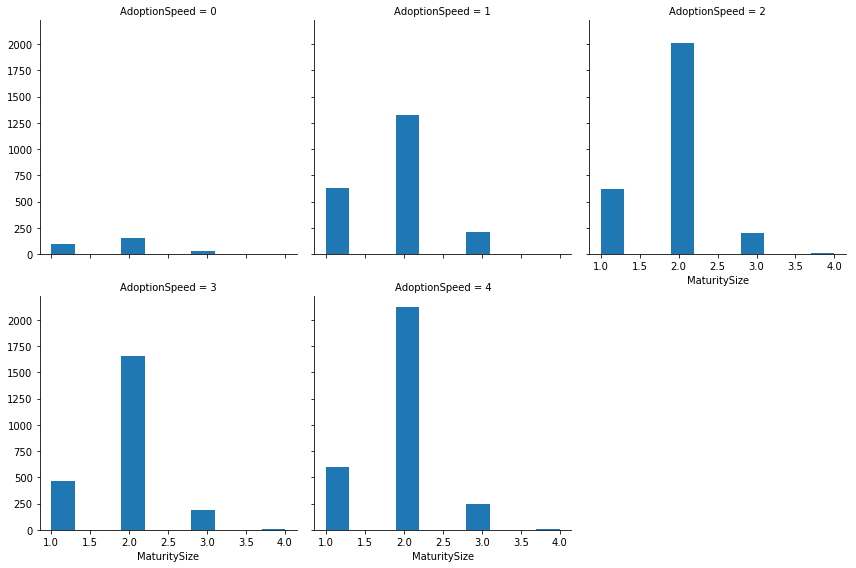

In [99]:
g = sns.FacetGrid(original_df, col='AdoptionSpeed',
                 height=4, aspect=1,col_wrap=3)
g.map(plt.hist, 'MaturitySize')

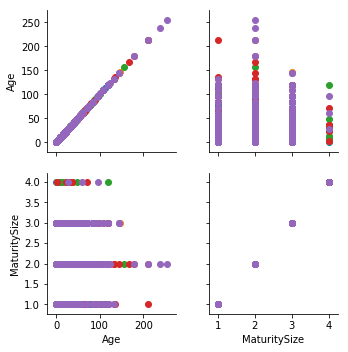

In [103]:
g = sns.PairGrid(original_df, vars=['Age','MaturitySize'], hue='AdoptionSpeed')
g.map(plt.scatter)

In [121]:
original_df.Type.value_counts()

1    5770
2    4812
Name: Type, dtype: int64

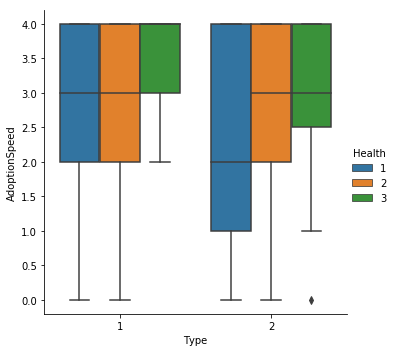

In [133]:
sns.catplot(x='Type', y='AdoptionSpeed', kind='box', 
            data=copy, hue='Health')

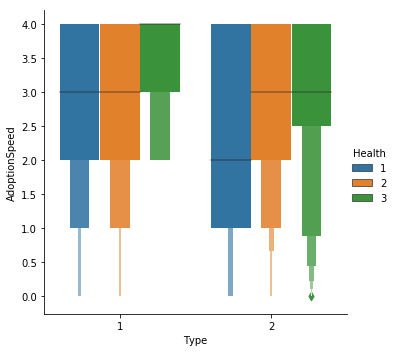

In [132]:
sns.catplot(x='Type', y='AdoptionSpeed', kind='boxen', 
            data=copy, hue='Health')

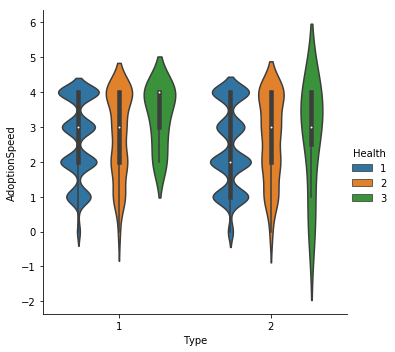

In [138]:
sns.catplot(x='Type', y='AdoptionSpeed', kind='violin', 
            data=copy, hue='Health')